In [1]:
%load_ext autoreload

In [4]:
from DASH.src.networks.wrn1d import ResNet1D
from DASH.src.networks.tcn import TCN
from external_ts.my_extract import get_timeseries_dataloaders
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt 

lr = 1e-4
bs = 512

DEVICE = torch.device("cuda:0")
train_loader, val_loader, test_loader = get_timeseries_dataloaders(
    "./datasets/all_six_datasets/ETT-small/ETTh1.csv",
    batch_size=bs,
)

# test_model = ResNet1D(
#     in_channels=1,
#     num_pred_classes=96
# ).to(DEVICE)

# test_model = TCN(
#     input_size=1,
#     output_size=96,
#     num_channels=[4],
#     kernel_size=11,
#     dropout=0,
#     activation=None
# ).to(DEVICE)

class SimpleMLP(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()

        # self.test_conv = torch.nn.Conv1d(1, 1, 11, padding=5)
        # self.test_conv.weight.data = torch.tensor([[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]], dtype=torch.float32)
        # self.test_conv.bias.data.zero_()
        # self.maxpool = torch.nn.MaxPool1d(2)
        # self.relu = torch.nn.ReLU()
        self.fc = torch.nn.Linear(in_features=512, out_features=96)

    def forward(self, x):
        # x = self.test_conv(x)
        # x = self.maxpool(x)
        return self.fc(x)

class TestConv1D(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = torch.nn.Conv1d(1, 1, 17)
        self.maxpool1 = torch.nn.MaxPool1d(4)
        self.bn1 = torch.nn.BatchNorm1d(4)

        self.conv2 = torch.nn.Conv1d(4, 8, 17)
        self.maxpool2 = torch.nn.MaxPool1d(8)
        self.bn2 = torch.nn.BatchNorm1d(8)

        self.fc = torch.nn.Linear(496//4 * 4, 96)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        b = x.shape[0]
        i = x.shape[2]

        x = self.conv1(x)
        # x = self.maxpool1(x)
        # x = self.bn1(x)
        # x = self.relu(x)

        # x = self.conv2(x)
        # x = self.maxpool2(x)
        # x = self.bn2(x).view(b, -1)
        # x = self.relu(x)

        x = self.fc(x)
        return x
test_model = SimpleMLP().to(DEVICE)
# assert test_model.activation is None
# test_model = SimpleMLP().to(DEVICE)

opt = torch.optim.Adam(
    test_model.parameters(),
    lr=lr
)

loss_hist = list()

test_model.train()
for epoch in range(5):
    for batch in tqdm(train_loader):
        opt.zero_grad()
        x, y = batch 
        preds = test_model(x.to(DEVICE).view(x.shape[0], -1))
        loss = torch.nn.functional.mse_loss(preds, y.to(DEVICE))
        loss.backward()
        opt.step()

        loss_hist.append(loss.item())

train_ds = train_loader.dataset
obs_id = 0


100%|██████████| 110/110 [00:03<00:00, 27.56it/s]


In [1]:
import numpy as np
test = np.load("results_acc/ETTh1/default/0/0/test_score.npy")

In [3]:
test

array([1.11742045, 1.1143751 ])

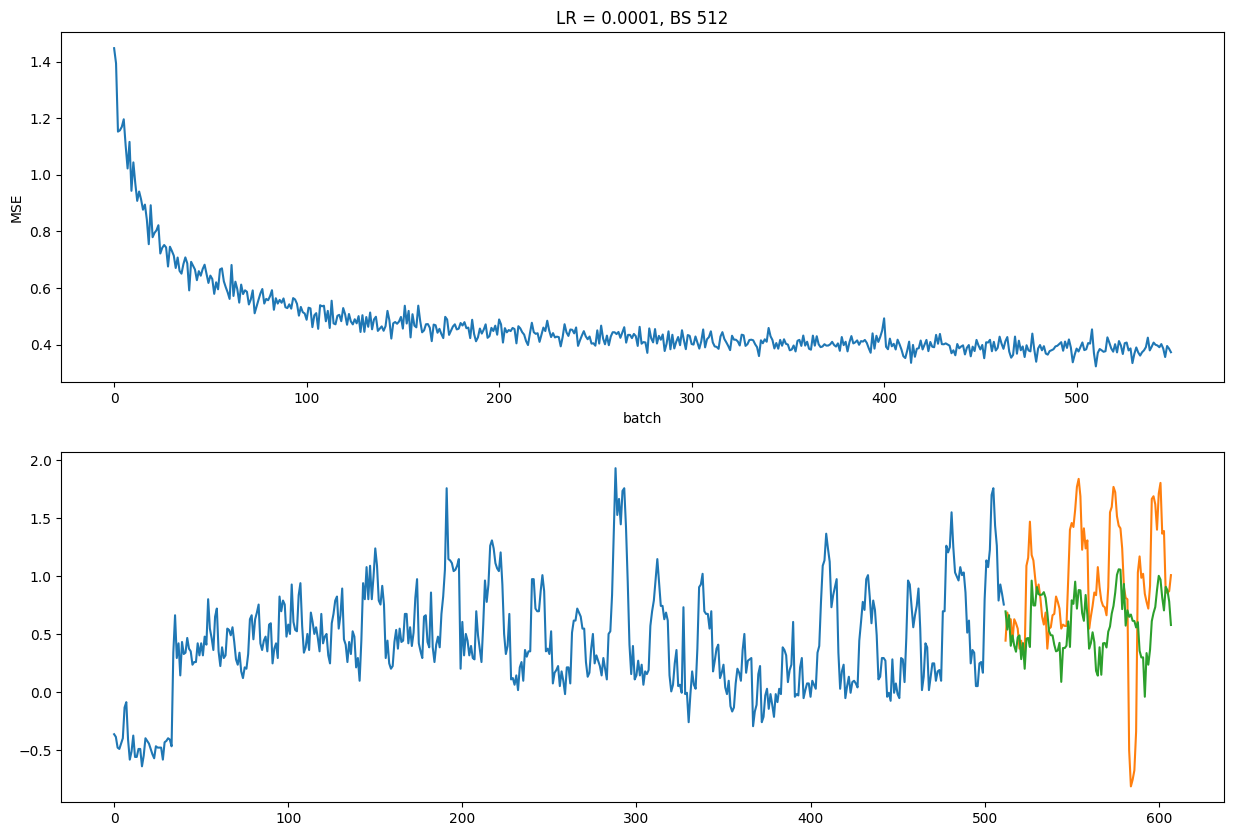

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

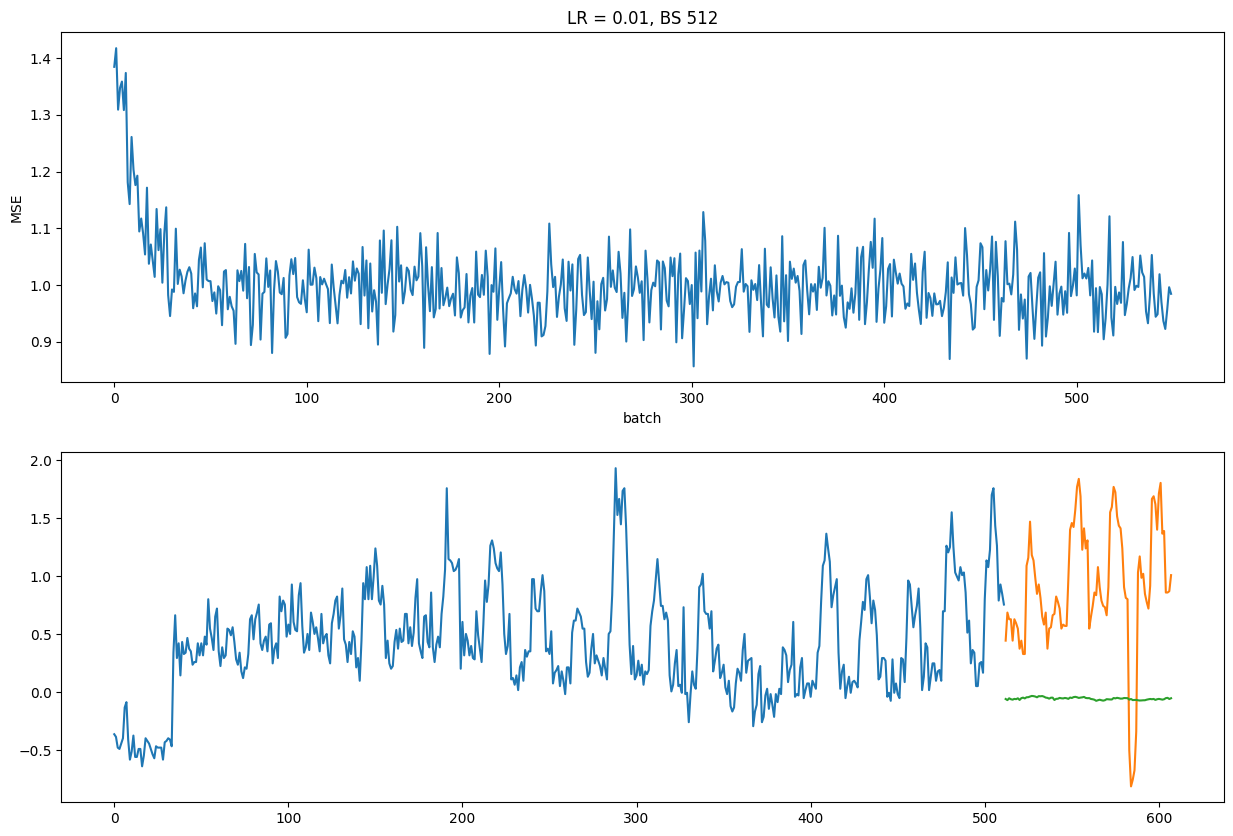

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

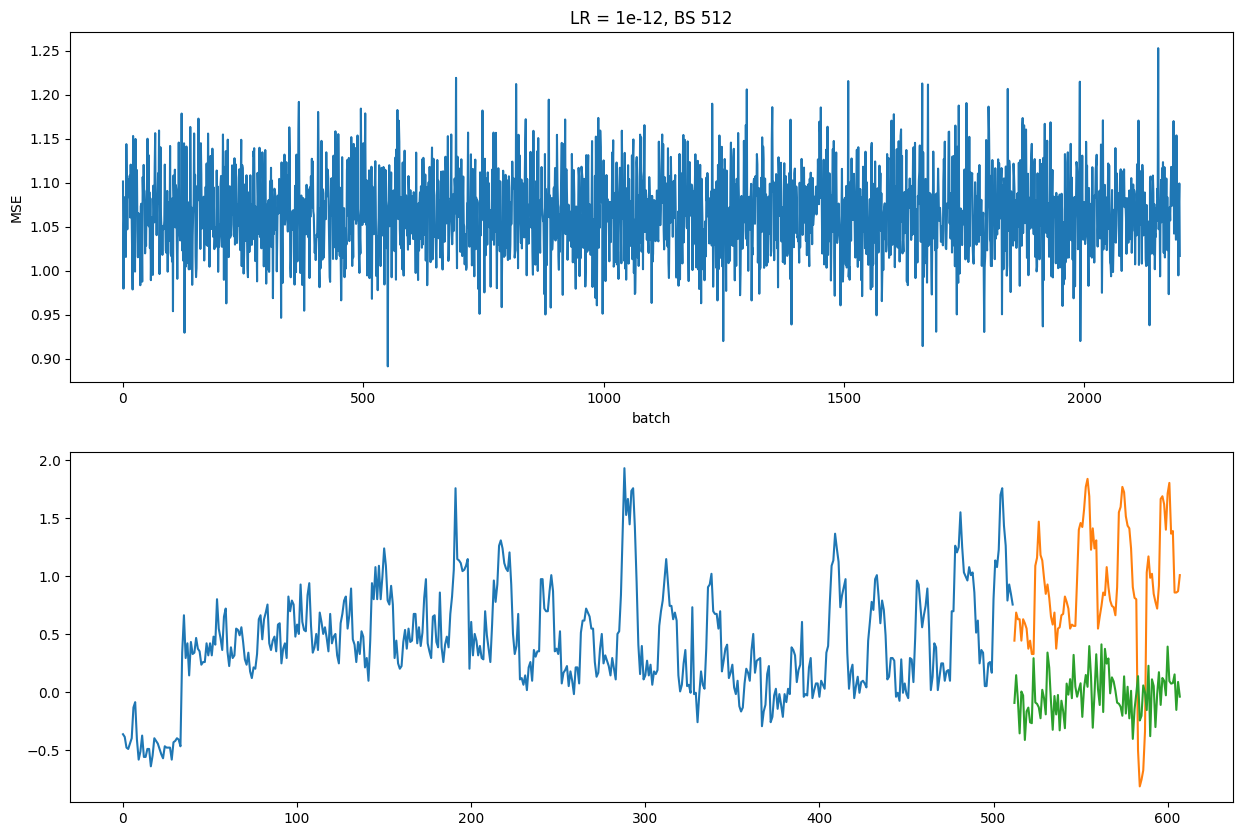

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

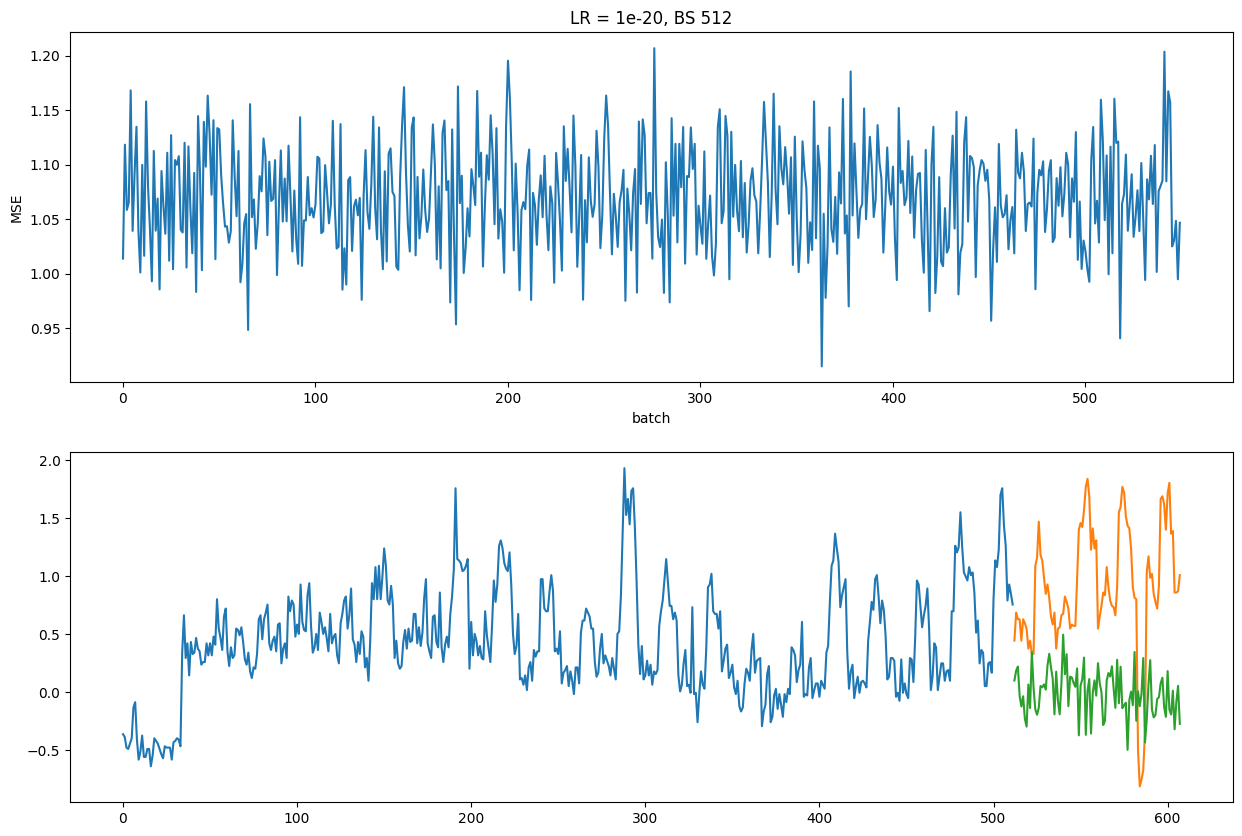

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

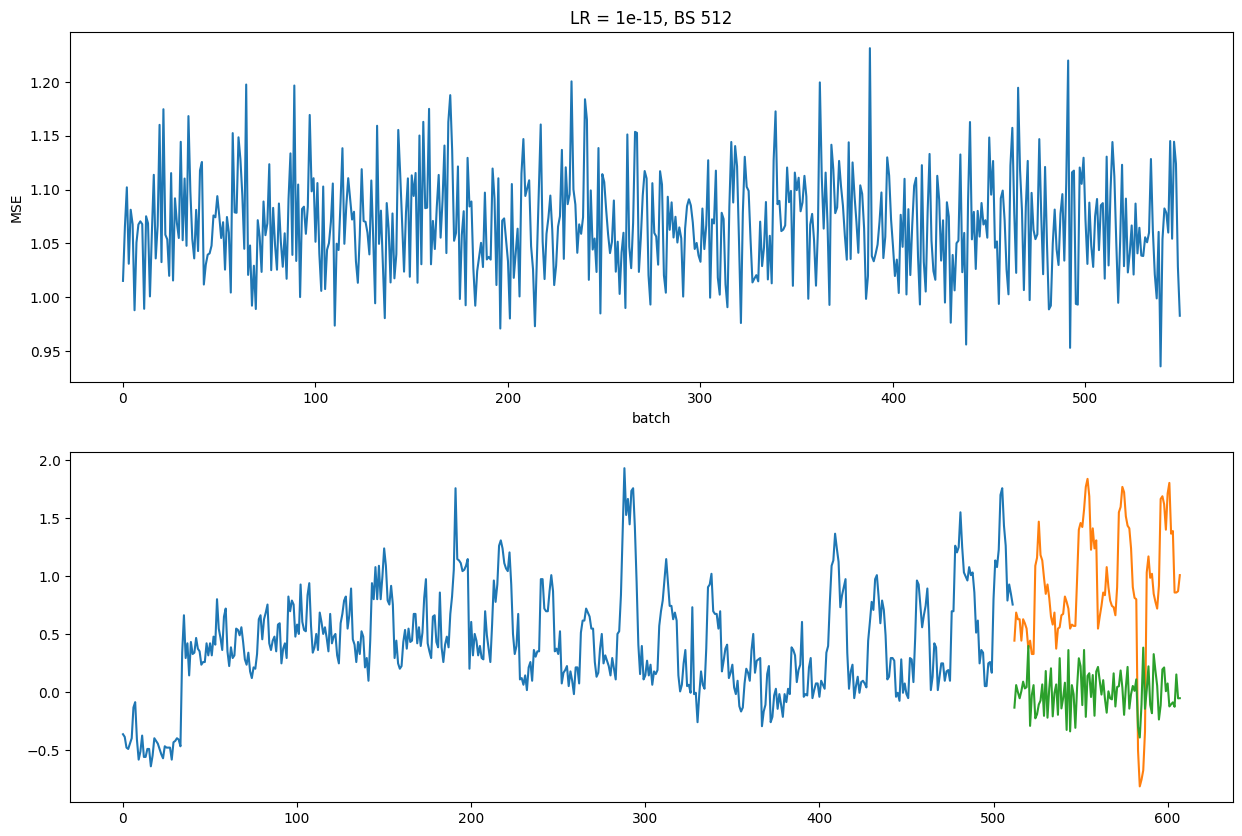

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

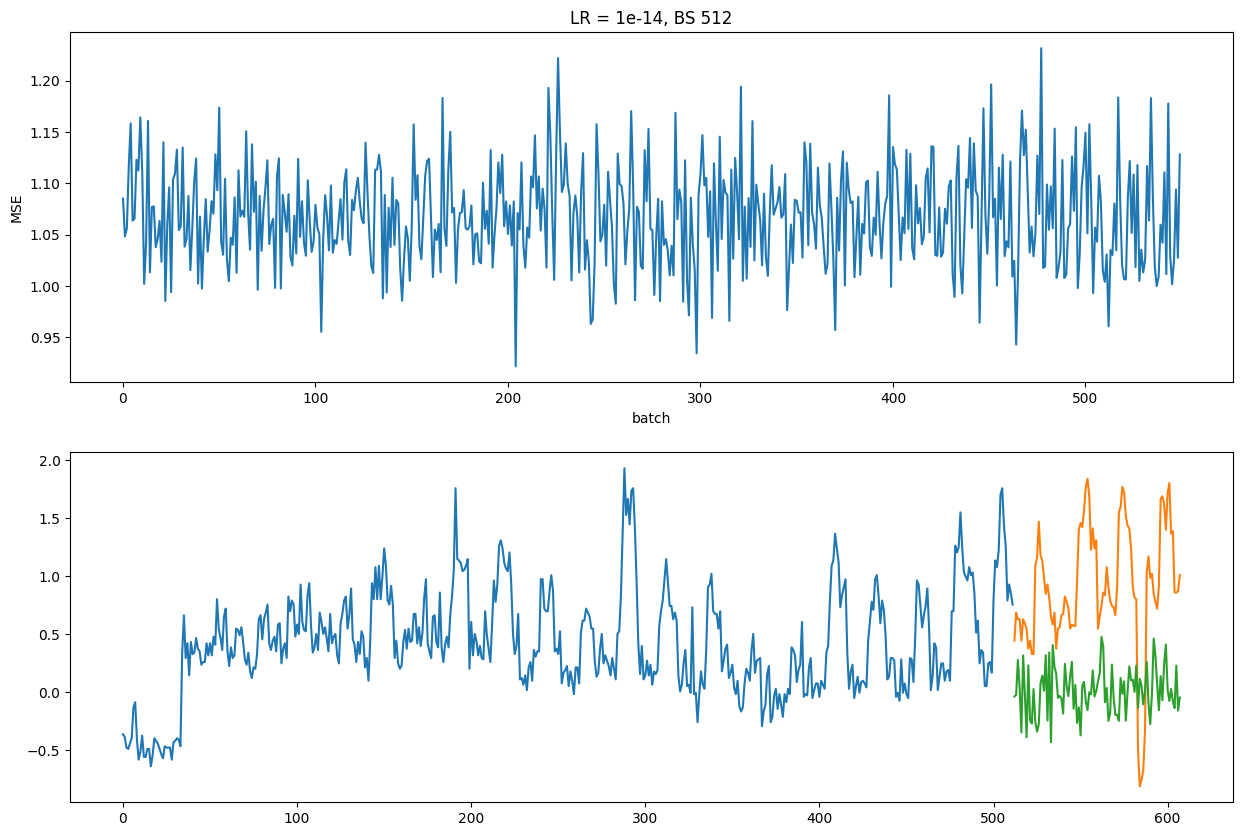

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

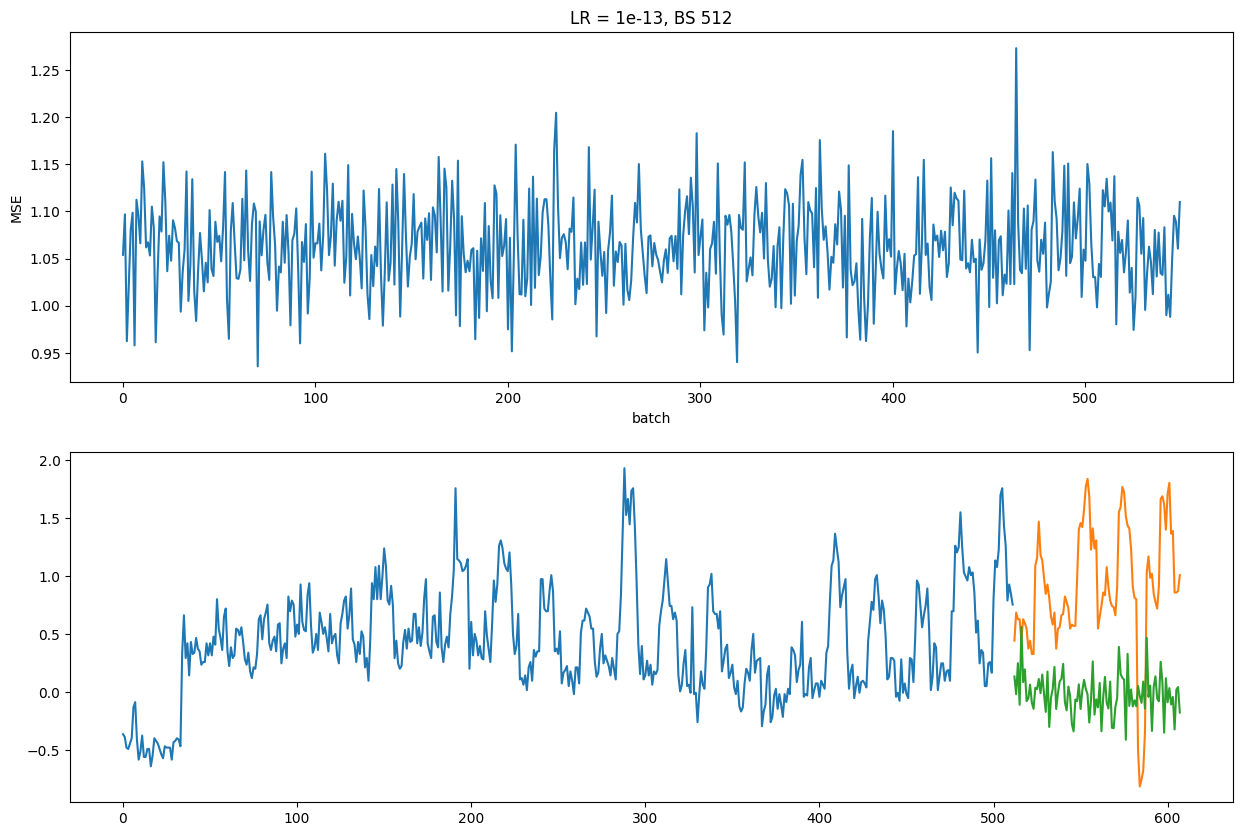

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

Text(0.5, 1.0, 'LR = 1e-2')

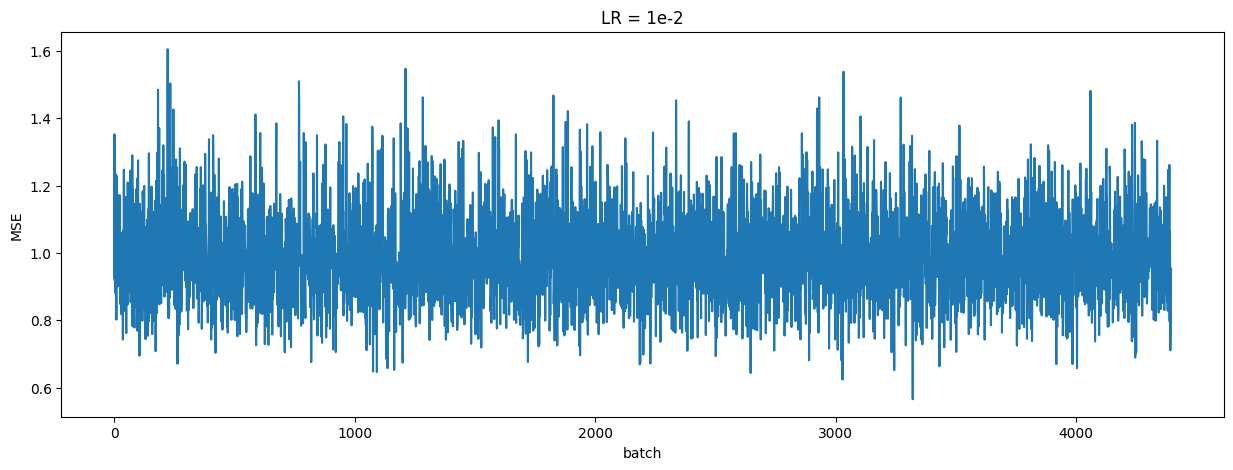

In [13]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(loss_hist)
ax.set_xlabel("batch")
ax.set_ylabel("MSE")
ax.set_title("LR = 1e-2")

Text(0.5, 1.0, 'LR = 1e-1')

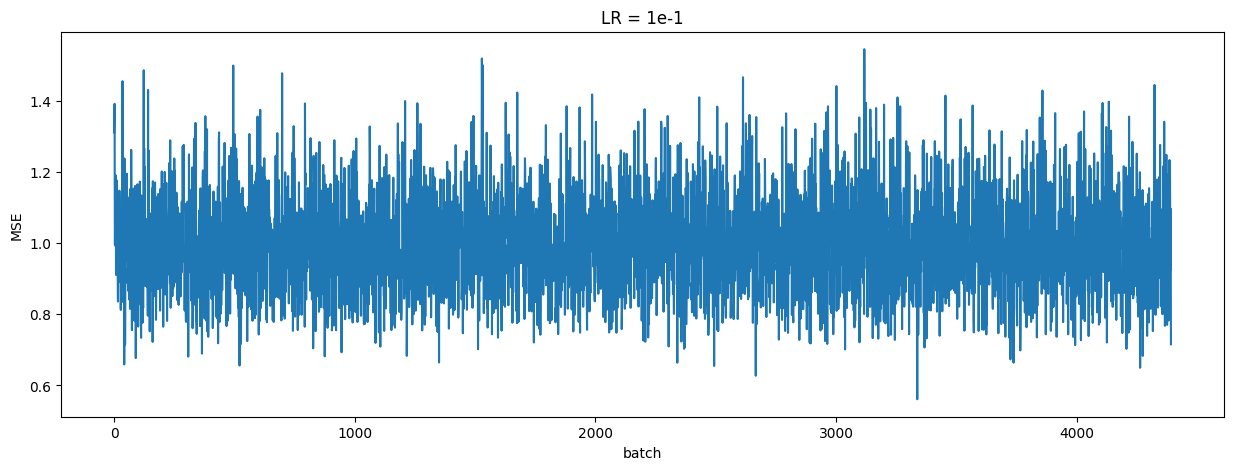

In [30]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(loss_hist[3:])
ax.set_xlabel("batch")
ax.set_ylabel("MSE")
ax.set_title("LR = 1e-1")

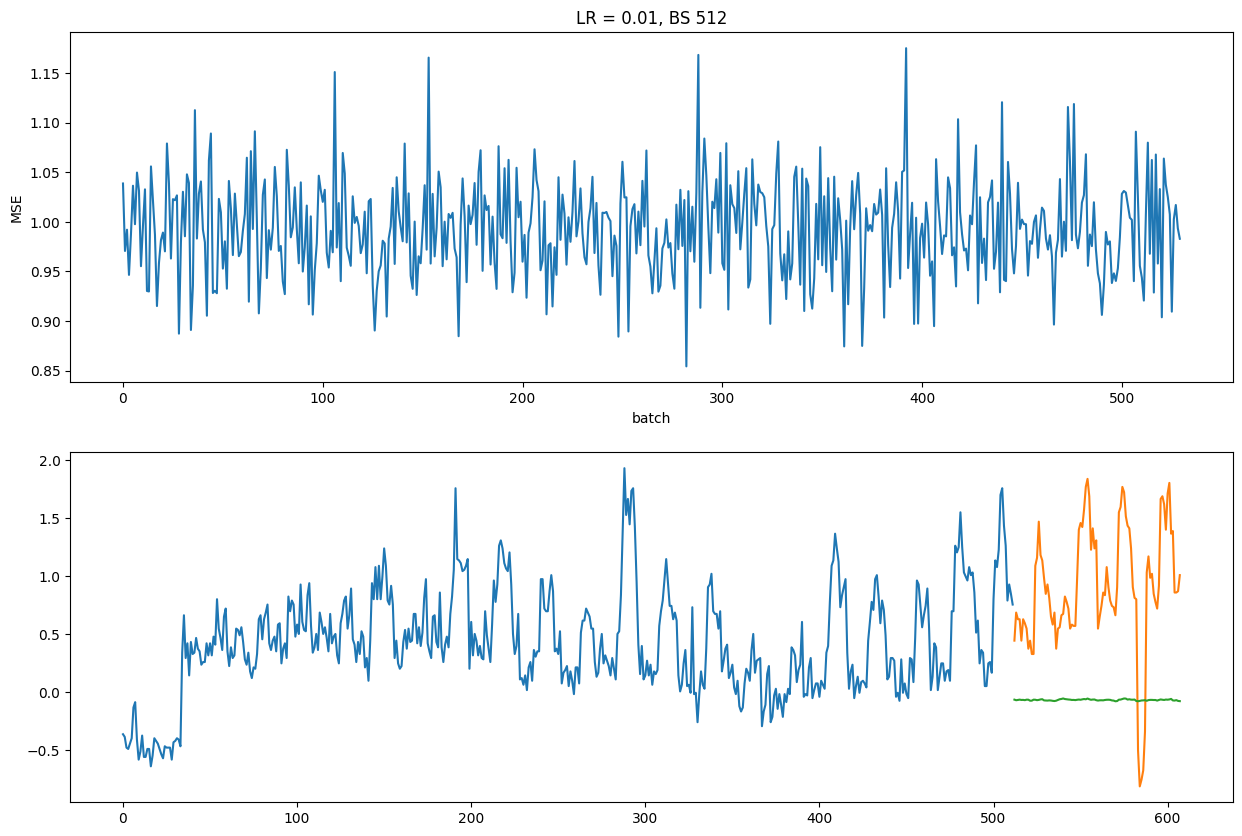

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist[20:])
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

Text(0.5, 1.0, 'LR = 1e-8, BS 512')

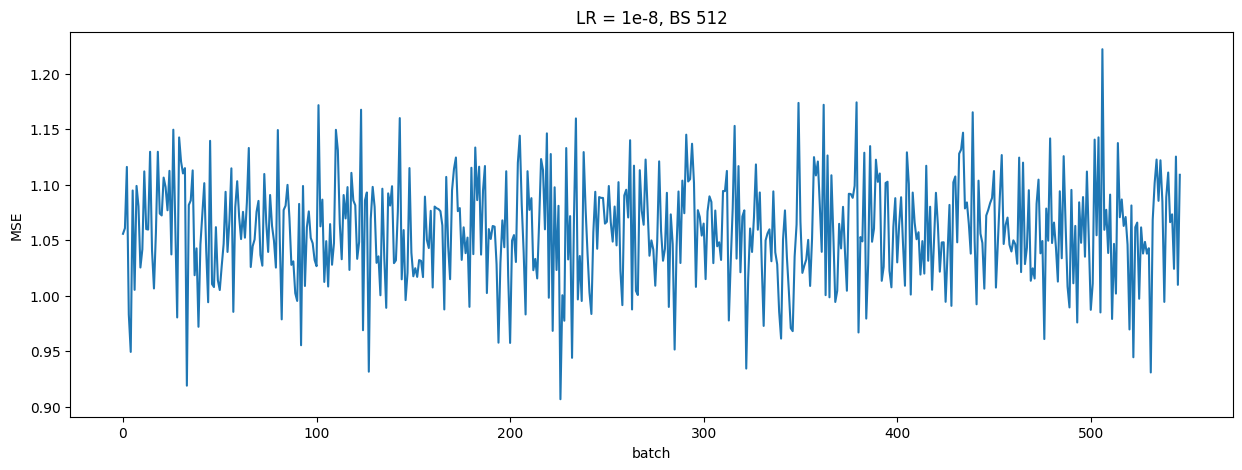

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist[3:])
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title("LR = 1e-8, BS 512")

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax.plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

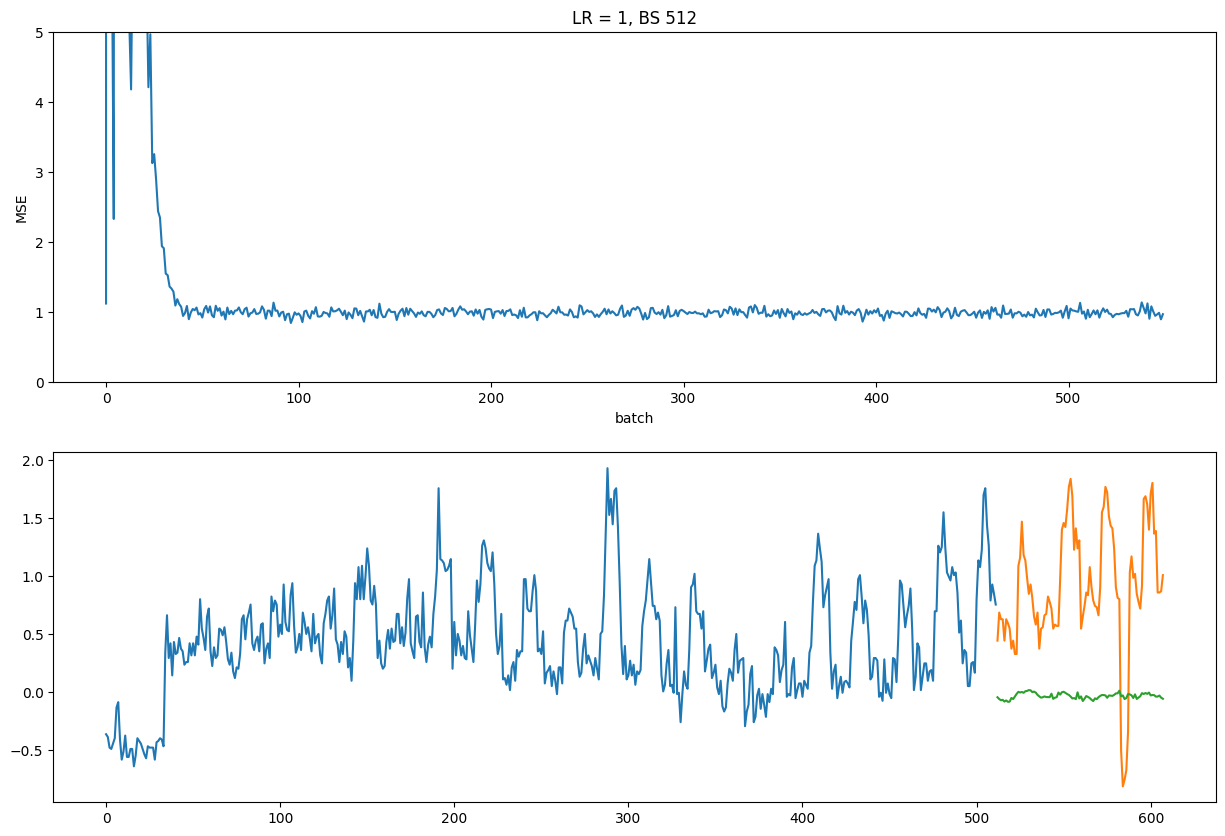

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")
ax[0].set_ylim(0, 5)

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())

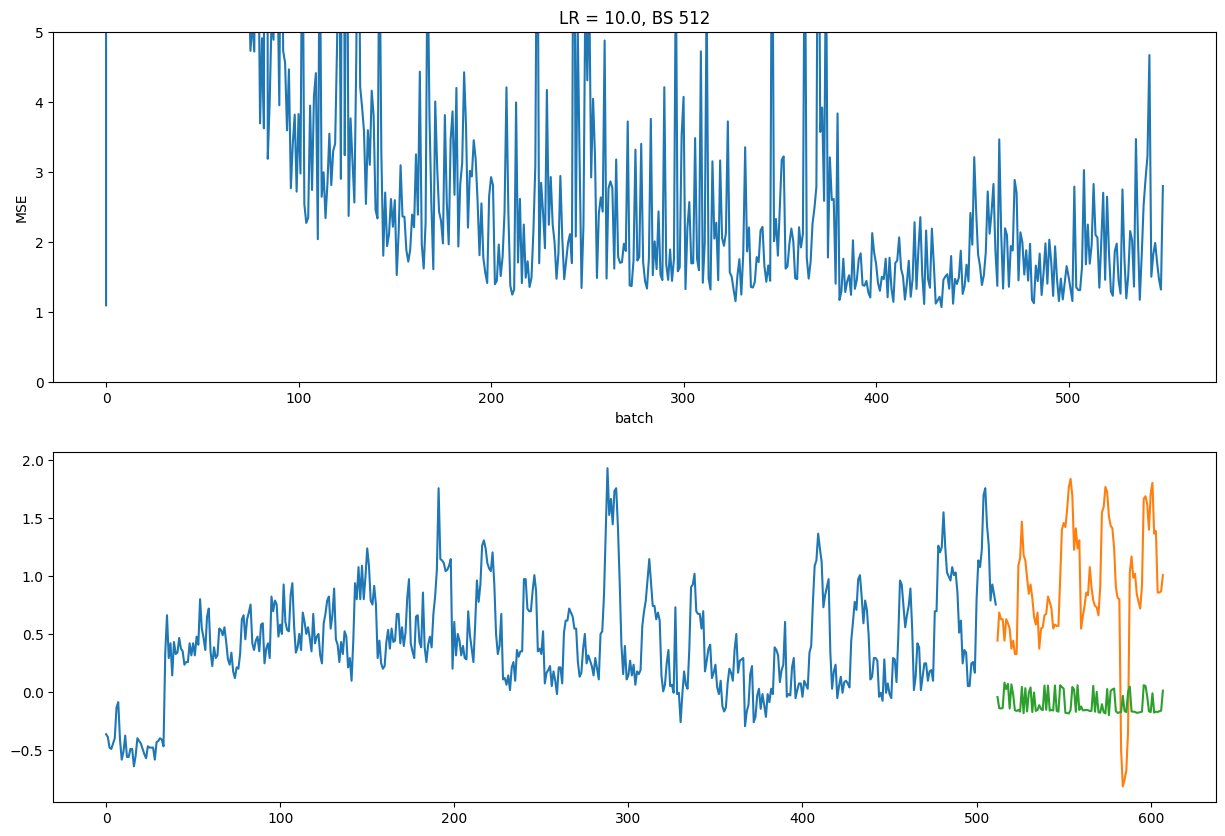

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(loss_hist)
ax[0].set_xlabel("batch")
ax[0].set_ylabel("MSE")
ax[0].set_title(f"LR = {lr}, BS {bs}")
ax[0].set_ylim(0, 5)

ax[1].plot(train_ds[obs_id][0].flatten())
ax[1].plot(range(512, 512+96), train_ds[obs_id][1].flatten())
test_model.eval()
with torch.no_grad():
    ax[1].plot(range(512, 512+96), test_model(train_ds[obs_id][0].to(DEVICE)[None, :]).cpu().flatten())